[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/codebysumit/100-days-of-deep-learning-challenge/blob/master/Day%204/hinge-loss-perceptron-with-gradient-decent.ipynb)

In [ ]:
from sklearn.datasets import make_classification
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=15)

**Activation Function:** Binary Step Function (also called Threshold Function)

$$f(z) =
\begin{cases}
1, & \text{if } z > 0 \\
-1, & \text{if } z \le 0
\end{cases}$$

In [ ]:
y = np.where(y == 0, -1, 1)

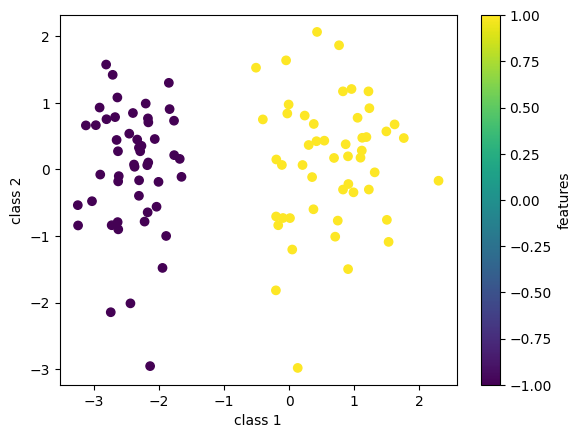

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('class 1')
plt.ylabel('class 2')
plt.colorbar(label='features')
plt.show()

**Read This article:** [Perceptron Algorithm || Basics to Advanced](https://medium.com/@ngneha090/perceptron-algorithm-basics-to-advanced-5567a8035e42)

**Hinge Loss:**

$$L(w,b ; x_{i},y_{i}) = max(0, -y_{i}(w(x_{i}) + b))$$


**Gradient Decent:**

$$w_i' = w_i - \eta \left( \frac{\partial L}{\partial w_i} \right),
\quad \text{where } \eta = \text{learning rate.}$$


Note that the loss  takes two different forms depending on the classification condition, hence the partial derivative also differs:

$$\frac{\partial L}{\partial w_i} =
\begin{cases}
0, & \text{if } -y_i \big( w \cdot x_i + b \big) \le 0 \\[8pt]
-\,y_i\,x_i, & \text{if } -y_i \big( w \cdot x_i + b \big) > 0
\end{cases}$$

This implies the weight update rule:

$$w_i' =
\begin{cases}
w_i, & \text{if } -y_i \big( w \cdot x_i + b \big) \le 0 \\[8pt]
w_i + \eta\,y_i\,x_i, & \text{if } -y_i \big( w \cdot x_i + b \big) > 0
\end{cases}$$

Similarly, the bias update rule becomes:

$$b' =
\begin{cases}
b, & \text{if } -y_i \big( w \cdot x_i + b \big) \le 0 \\[8pt]
b + \eta\,y_i, & \text{if } -y_i \big( w \cdot x_i + b \big) > 0
\end{cases}$$

In [ ]:
class Perceptron:
    def __init__(self, lr=0.01, epochs=8000, random_state=42):
        self.lr = lr
        self.epochs = epochs
        self.random_state = random_state
        np.random.seed(random_state)
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # y = np.where(y == 0, -1, 1)  # ensure labels are -1 and 1

        if self.weights is None:
            self.weights = np.random.rand(X.shape[1])
        if self.bias is None:
            self.bias = np.random.rand(1)[0]

        for _ in range(self.epochs):
            for i in range(X.shape[0]):
                z = np.dot(X[i], self.weights) + self.bias
                if y[i] * z <= 0:  # misclassified
                    self.weights += self.lr * y[i] * X[i]
                    self.bias += self.lr * y[i]

        return self.weights, self.bias

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return np.where(y_pred > 0, 1, -1)

In [ ]:
p = Perceptron(epochs=10000)

In [ ]:
result = p.fit(X, y)

In [ ]:
prediction = p.predict(X)

In [ ]:
prediction_result = prediction == y

In [ ]:
currect = np.count_nonzero(prediction_result)
wrong= prediction_result.size - currect

print("Currect Prediction:", currect)
print("Wrong Prediction:", wrong)

Currect Prediction: 100
Wrong Prediction: 0


In [ ]:
w1, w2 = result[0]
b = result[1]

In [ ]:
m = -(w1/w2)
c = -(b/w2)

print(m,c)

-2.704973289006189 -2.962831144170297


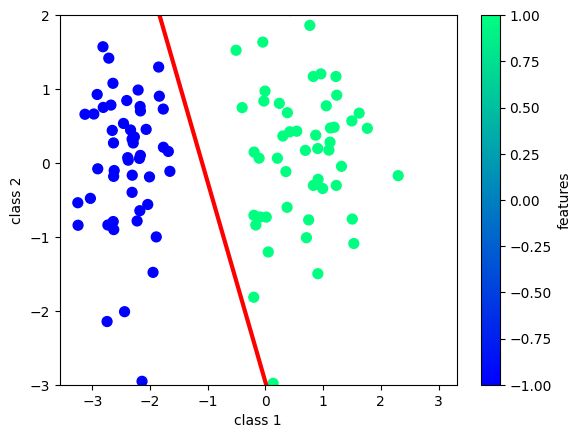

In [ ]:
#generating 100 points
xi=np.linspace(-3,3,100)
#line
yi=m*xi+c
# plotting decision boundary
plt.plot(xi,yi,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=50)
plt.xlabel('class 1')
plt.ylabel('class 2')
plt.colorbar(label='features')
plt.ylim(-3,2)
plt.show()

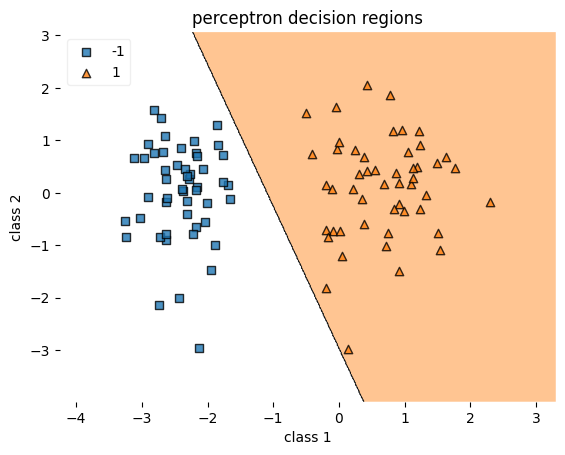

In [ ]:
from mlxtend.plotting import plot_decision_regions

# Plotting decision regions
plot_decision_regions(X, y, clf=p, legend=2)

# Adding axes annotations
plt.xlabel('class 1')
plt.ylabel('class 2')
plt.title('perceptron decision regions')
plt.show()